## 58:with dryout
## 74:good agreement OHP2 large, but no dryout

In [1]:
# using Pkg
# Pkg.activate(dirname(pwd()))
using ComputationalHeatTransfer
using Plots
gr()  
using XLSX
using JLD2
using SparseArrays


## Get fluid properties

In [2]:
fluid_type = "butane"
Tᵥ = 291.2

291.2

In [3]:
using UnPack

p_fluid = SaturationFluidProperty(fluid_type,Tᵥ)
@unpack Cpₗ,ρₗ,μₗ,hₗ,kₗ,Prₗ,Cpᵥ,ρᵥ,μᵥ,hᵥ,kᵥ,Prᵥ,σ,P,R,M,Rkg,αₗ,νₗ,νᵥ,hₗᵥ = p_fluid;

In [4]:
name_dict = [
    "ASETS-II OHP 1 SMALL HEATER_10W.jld2";
    "ASETS-II OHP 1 SMALL HEATER_20W.jld2";
    "ASETS-II OHP 1 SMALL HEATER_30W.jld2";
    "ASETS-II OHP 1 SMALL HEATER_40W.jld2";
    "ASETS-II OHP 1 LARGE HEATER_10W.jld2";
    "ASETS-II OHP 1 LARGE HEATER_20W.jld2";
    "ASETS-II OHP 1 LARGE HEATER_30W.jld2";
    "ASETS-II OHP 1 LARGE HEATER_40W.jld2";
    "ASETS-II OHP 2 SMALL HEATER_10W.jld2";
    "ASETS-II OHP 2 SMALL HEATER_20W.jld2";
    "ASETS-II OHP 2 SMALL HEATER_30W.jld2";
    "ASETS-II OHP 2 SMALL HEATER_40W.jld2";
    "ASETS-II OHP 2 LARGE HEATER_10W.jld2";
    "ASETS-II OHP 2 LARGE HEATER_20W.jld2";
    "ASETS-II OHP 2 LARGE HEATER_30W.jld2";
    "ASETS-II OHP 2 LARGE HEATER_40W.jld2";
];

name_exp_dict = [
    "20190607_F_PD_%23013_O001_H002_P010_expA.xlsx";
    "20190608_F_PD_%23014_O001_H002_P020_expA.xlsx";
    "20190614_F_PD_%23015_O001_H002_P030_expA.xlsx";
    "20190617_F_PD_%23016_O001_H002_P040_expA.xlsx";
    "20190604_F_PD_%23001_O001_H001_P010_expA.xlsx";
    "20190606_F_PD_%23002_O001_H001_P020_expA.xlsx";
    "20190612_F_PD_%23003_O001_H001_P030_expA.xlsx";
    "20190613_F_PD_%23004_O001_H001_P040_expA.xlsx";
    "20190607_F_PD_%23017_O002_H002_P010_expA.xlsx";
    "20190608_F_PD_%23018_O002_H002_P020_expA.xlsx";
    "20190614_F_PD_%23019_O002_H002_P030_expA.xlsx";
    "20190617_F_PD_%23020_O002_H002_P040_expA.xlsx";
    "20190604_F_PD_%23005_O002_H001_P010_expA.xlsx";
    "20190606_F_PD_%23006_O002_H001_P020_expA.xlsx";
    "20190612_F_PD_%23007_O002_H001_P030_expA.xlsx";
    "20190613_F_PD_%23008_O002_H001_P040_expA.xlsx";
];

In [5]:
OHPt_nume = Vector{Float64}[]
OHPg_nume = Vector{Vector{Float64}}[]
power_nume = Float64[]
for namei in name_dict
#     numerical
    power = parse(Int64,namei[findfirst("HEATER", namei)[end] .+ [2,3]])
#     OHPdata = load(dirname(dirname(dirname(pwd())))*"/OHPnume/Ca13E05_DT2/"*namei);
    OHPdata = load("/Users/yuxuanli/Documents/Hoffman/ohp58/OHPnume/"*namei);
    
    ohp = OHPdata["ohp"]
    boil_data = OHPdata["boil_data"]
    tube_hist_t = OHPdata["tube_hist_t"]
    tube_hist_θwall = OHPdata["tube_hist_θwall"]
    tube_hist_u = OHPdata["tube_hist_u"]
    integrator_tube = OHPdata["integrator_tube"]
    sysfinal = getsysfinal(tube_hist_u,tube_hist_θwall,integrator_tube);

    plate_T_hist = OHPdata["plate_T_hist"]

    integrator_plate = OHPdata["integrator_plate"]
    sys = integrator_plate.p
    
    
    x = [-2.9inch,-1.4inch,-0.8inch,0.0,0.0,0.8inch,1.4inch,2.9inch]
    y = [0.0,0.0,0.0,0.0,0.4inch,0.0,0.0,0.0];
    X =  VectorData(x,y);
    H = Regularize(X,cellsize(sys),I0=origin(sys.grid))
    g = ScalarData(X);
    ghist = getghist(g,H,plate_T_hist);
    thist = tube_hist_t;

    push!(OHPt_nume,thist)
    push!(OHPg_nume,ghist)
    push!(power_nume,power)
end

┌ Warning: saved type Wall is missing field boiltime_stations in workspace type; reconstructing
└ @ JLD2 /Users/yuxuanli/.julia/packages/JLD2/wKJEL/src/data/reconstructing_datatypes.jl:164
Error encountered while load FileIO.File{FileIO.DataFormat{:JLD2}, String}("/Users/yuxuanli/Documents/Hoffman/ohp58/OHPnume/ASETS-II OHP 1 SMALL HEATER_10W.jld2").

Fatal error:


LoadError: MethodError: [0mCannot `convert` an object of type [92mJLD2.ReconstructedTypes.var"##Wall#314"[39m[0m to an object of type [91mWall[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T at Base.jl:61
[0m  Wall(::Any, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m) at ~/Documents/GitHub/ComputationalHeatTransfer.jl/src/intube/Systems.jl:94
Stacktrace:
  [1] [0m[1mrconvert[22m[0m[1m([22m[90mT[39m::[0mType, [90mx[39m::[0mJLD2.ReconstructedTypes.var"##Wall#314"[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/data/[39m[90m[4mcustom_serialization.jl:10[24m[39m
  [2] [0m[1mjlconvert[22m
[90m    @ [39m[90m~/.julia/packages/JLD2/wKJEL/src/data/[39m[90m[4mwriting_datatypes.jl:315[24m[39m[90m [inlined][39m
  [3] [0m[1mmacro expansion[22m
[90m    @ [39m[90m~/.julia/packages/JLD2/wKJEL/src/data/[39m[90m[4mreconstructing_datatypes.jl:560[24m[39m[90m [inlined][39m
  [4] [0m[1mjlconvert[22m[0m[1m([22m[90m#unused#[39m::[0mJLD2.ReadRepresentation[90m{PHPSystem, JLD2.OnDiskRepresentation{(0, 8, 16, 24, 32), Tuple{Tube, Liquid, Vapor, Wall, Mapping}, NTuple{5, JLD2.RelOffset}, 40}()}[39m, [90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90mptr[39m::[0mPtr[90m{Nothing}[39m, [90mheader_offset[39m::[0mJLD2.RelOffset[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/data/[39m[90m[4mreconstructing_datatypes.jl:525[24m[39m
  [5] [0m[1mread_scalar[22m[0m[1m([22m[90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90mrr[39m::[0mJLD2.ReadRepresentation[90m{PHPSystem, JLD2.OnDiskRepresentation{(0, 8, 16, 24, 32), Tuple{Tube, Liquid, Vapor, Wall, Mapping}, NTuple{5, JLD2.RelOffset}, 40}()}[39m, [90mheader_offset[39m::[0mJLD2.RelOffset[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mdataio.jl:37[24m[39m
  [6] [0m[1mread_data[22m[0m[1m([22m[90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90mrr[39m::[0mAny, [90mread_dataspace[39m::[0mTuple[90m{JLD2.ReadDataspace, JLD2.RelOffset, JLD2.DataLayout, JLD2.FilterPipeline}[39m, [90mattributes[39m::[0mVector[90m{JLD2.ReadAttribute}[39m[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mdatasets.jl:238[24m[39m
  [7] [0m[1mread_data[22m[0m[1m([22m[90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90mdataspace[39m::[0mJLD2.ReadDataspace, [90mdatatype_class[39m::[0mUInt8, [90mdatatype_offset[39m::[0mInt64, [90mlayout[39m::[0mJLD2.DataLayout, [90mfilters[39m::[0mJLD2.FilterPipeline, [90mheader_offset[39m::[0mJLD2.RelOffset, [90mattributes[39m::[0mVector[90m{JLD2.ReadAttribute}[39m[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mdatasets.jl:194[24m[39m
  [8] [0m[1mload_dataset[22m[0m[1m([22m[90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90moffset[39m::[0mJLD2.RelOffset[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mdatasets.jl:125[24m[39m
  [9] [0m[1mjlconvert[22m
[90m    @ [39m[90m~/.julia/packages/JLD2/wKJEL/src/data/[39m[90m[4mwriting_datatypes.jl:314[24m[39m[90m [inlined][39m
 [10] [0m[1mmacro expansion[22m
[90m    @ [39m[90m~/.julia/packages/JLD2/wKJEL/src/data/[39m[90m[4mreconstructing_datatypes.jl:606[24m[39m[90m [inlined][39m
 [11] [0m[1mjlconvert[22m[0m[1m([22m[90m#unused#[39m::[0mJLD2.ReadRepresentation[90m{ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, PHPSystem, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, JLD2.OnDiskRepresentation{(0, 1, 9, 25, 33, 33), Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Float64}, Tuple{Float64, Float64}, PHPSystem, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, JLD2.RelOffset, Tuple{Float64, Float64}, JLD2.RelOffset, nothing, nothing}, 33}()}[39m, [90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90mptr[39m::[0mPtr[90m{Nothing}[39m, [90mheader_offset[39m::[0mJLD2.RelOffset[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/data/[39m[90m[4mreconstructing_datatypes.jl:525[24m[39m
 [12] [0m[1mmacro expansion[22m
[90m    @ [39m[90m~/.julia/packages/JLD2/wKJEL/src/data/[39m[90m[4mreconstructing_datatypes.jl:606[24m[39m[90m [inlined][39m
 [13] [0m[1mjlconvert[22m[0m[1m([22m[90m#unused#[39m::[0mJLD2.ReadRepresentation[90m{ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, PHPSystem, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, RK4, OrdinaryDiffEq.InterpolationData{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, OrdinaryDiffEq.RK4ConstantCache}, DiffEqBase.DEStats, Nothing}, JLD2.OnDiskRepresentation{(0, 8, 8, 8, 16, 24, 57, 57, 83, 84, 92, 100, 100), Tuple{Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, PHPSystem, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, RK4, OrdinaryDiffEq.InterpolationData{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, OrdinaryDiffEq.RK4ConstantCache}, Bool, Int64, DiffEqBase.DEStats, Nothing, SciMLBase.ReturnCode.T}, Tuple{JLD2.RelOffset, nothing, nothing, JLD2.RelOffset, JLD2.RelOffset, JLD2.OnDiskRepresentation{(0, 1, 9, 25, 33, 33), Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Float64}, Tuple{Float64, Float64}, PHPSystem, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, JLD2.RelOffset, Tuple{Float64, Float64}, JLD2.RelOffset, nothing, nothing}, 33}(), nothing, JLD2.OnDiskRepresentation{(0, 1, 9, 17, 25, 26), Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Bool, OrdinaryDiffEq.RK4ConstantCache}, Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, JLD2.RelOffset, JLD2.RelOffset, JLD2.RelOffset, Bool, nothing}, 26}(), Bool, Int64, JLD2.RelOffset, nothing, SciMLBase.ReturnCode.T}, 104}()}[39m, [90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90mptr[39m::[0mPtr[90m{Nothing}[39m, [90mheader_offset[39m::[0mJLD2.RelOffset[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/data/[39m[90m[4mreconstructing_datatypes.jl:525[24m[39m
 [14] [0m[1mmacro expansion[22m
[90m    @ [39m[90m~/.julia/packages/JLD2/wKJEL/src/data/[39m[90m[4mreconstructing_datatypes.jl:560[24m[39m[90m [inlined][39m
 [15] [0m[1mjlconvert[22m[0m[1m([22m[90m#unused#[39m::[0mJLD2.ReadRepresentation[90m{OrdinaryDiffEq.ODEIntegrator{RK4, false, Vector{Float64}, Nothing, Float64, PHPSystem, Float64, Float64, Float64, Float64, Vector{Vector{Float64}}, ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, PHPSystem, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, RK4, OrdinaryDiffEq.InterpolationData{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, OrdinaryDiffEq.RK4ConstantCache}, DiffEqBase.DEStats, Nothing}, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, OrdinaryDiffEq.RK4ConstantCache, OrdinaryDiffEq.DEOptions{Float64, Float64, Float64, Float64, PIController{Rational{Int64}}, typeof(DiffEqBase.ODE_DEFAULT_NORM), typeof(LinearAlgebra.opnorm), Nothing, CallbackSet{Tuple{}, Tuple{DiscreteCallback{typeof(fixdx_condition), typeof(fixdx_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(boiling_condition), typeof(boiling_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(merging_condition), typeof(merging_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(vaporMergingCondition), typeof(vaporMergingAffect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}}}, typeof(DiffEqBase.ODE_DEFAULT_ISOUTOFDOMAIN), typeof(DiffEqBase.ODE_DEFAULT_PROG_MESSAGE), typeof(DiffEqBase.ODE_DEFAULT_UNSTABLE_CHECK), DataStructures.BinaryHeap{Float64, DataStructures.FasterForward}, DataStructures.BinaryHeap{Float64, DataStructures.FasterForward}, Nothing, Nothing, Float64, Tuple{}, Tuple{}, Tuple{}}, Vector{Float64}, Float64, Nothing, OrdinaryDiffEq.DefaultInit}, JLD2.OnDiskRepresentation{(0, 104, 112, 112, 120, 128, 136, 137, 145, 153, 161, 161, 169, 169, 177, 178, 186, 194, 202, 210, 218, 226, 234, 242, 250, 258, 266, 274, 274, 274, 282, 283, 284, 285, 286, 294, 302, 310, 311, 312, 313, 314, 315, 316, 324, 332, 332, 340), Tuple{ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, PHPSystem, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, RK4, OrdinaryDiffEq.InterpolationData{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, OrdinaryDiffEq.RK4ConstantCache}, DiffEqBase.DEStats, Nothing}, Vector{Float64}, Nothing, Vector{Vector{Float64}}, Float64, Float64, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, PHPSystem, Vector{Float64}, Vector{Float64}, Nothing, Float64, RK4, Float64, Bool, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Int64, Int64, Int64, Int64, OrdinaryDiffEq.RK4ConstantCache, Nothing, Int64, Bool, Bool, Bool, Bool, Int64, Int64, Float64, Bool, Bool, Bool, Bool, Bool, Bool, OrdinaryDiffEq.DEOptions{Float64, Float64, Float64, Float64, PIController{Rational{Int64}}, typeof(DiffEqBase.ODE_DEFAULT_NORM), typeof(LinearAlgebra.opnorm), Nothing, CallbackSet{Tuple{}, Tuple{DiscreteCallback{typeof(fixdx_condition), typeof(fixdx_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(boiling_condition), typeof(boiling_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(merging_condition), typeof(merging_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(vaporMergingCondition), typeof(vaporMergingAffect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}}}, typeof(DiffEqBase.ODE_DEFAULT_ISOUTOFDOMAIN), typeof(DiffEqBase.ODE_DEFAULT_PROG_MESSAGE), typeof(DiffEqBase.ODE_DEFAULT_UNSTABLE_CHECK), DataStructures.BinaryHeap{Float64, DataStructures.FasterForward}, DataStructures.BinaryHeap{Float64, DataStructures.FasterForward}, Nothing, Nothing, Float64, Tuple{}, Tuple{}, Tuple{}}, DiffEqBase.DEStats, OrdinaryDiffEq.DefaultInit, Vector{Float64}, Vector{Float64}}, Tuple{JLD2.OnDiskRepresentation{(0, 8, 8, 8, 16, 24, 57, 57, 83, 84, 92, 100, 100), Tuple{Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, PHPSystem, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, RK4, OrdinaryDiffEq.InterpolationData{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, OrdinaryDiffEq.RK4ConstantCache}, Bool, Int64, DiffEqBase.DEStats, Nothing, SciMLBase.ReturnCode.T}, Tuple{JLD2.RelOffset, nothing, nothing, JLD2.RelOffset, JLD2.RelOffset, JLD2.OnDiskRepresentation{(0, 1, 9, 25, 33, 33), Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Float64}, Tuple{Float64, Float64}, PHPSystem, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, JLD2.RelOffset, Tuple{Float64, Float64}, JLD2.RelOffset, nothing, nothing}, 33}(), nothing, JLD2.OnDiskRepresentation{(0, 1, 9, 17, 25, 26), Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Bool, OrdinaryDiffEq.RK4ConstantCache}, Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, JLD2.RelOffset, JLD2.RelOffset, JLD2.RelOffset, Bool, nothing}, 26}(), Bool, Int64, JLD2.RelOffset, nothing, SciMLBase.ReturnCode.T}, 104}(), JLD2.RelOffset, nothing, JLD2.RelOffset, Float64, Float64, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, JLD2.RelOffset, JLD2.RelOffset, JLD2.RelOffset, nothing, Float64, nothing, Float64, Bool, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Int64, Int64, Int64, Int64, nothing, nothing, Int64, Bool, Bool, Bool, Bool, Int64, Int64, Float64, Bool, Bool, Bool, Bool, Bool, Bool, JLD2.RelOffset, JLD2.RelOffset, nothing, JLD2.RelOffset, JLD2.RelOffset}, 348}()}[39m, [90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90mptr[39m::[0mPtr[90m{Nothing}[39m, [90mheader_offset[39m::[0mJLD2.RelOffset[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/data/[39m[90m[4mreconstructing_datatypes.jl:525[24m[39m
 [16] [0m[1mread_scalar[22m[0m[1m([22m[90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90mrr[39m::[0mJLD2.ReadRepresentation[90m{OrdinaryDiffEq.ODEIntegrator{RK4, false, Vector{Float64}, Nothing, Float64, PHPSystem, Float64, Float64, Float64, Float64, Vector{Vector{Float64}}, ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, PHPSystem, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, RK4, OrdinaryDiffEq.InterpolationData{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, OrdinaryDiffEq.RK4ConstantCache}, DiffEqBase.DEStats, Nothing}, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, OrdinaryDiffEq.RK4ConstantCache, OrdinaryDiffEq.DEOptions{Float64, Float64, Float64, Float64, PIController{Rational{Int64}}, typeof(DiffEqBase.ODE_DEFAULT_NORM), typeof(LinearAlgebra.opnorm), Nothing, CallbackSet{Tuple{}, Tuple{DiscreteCallback{typeof(fixdx_condition), typeof(fixdx_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(boiling_condition), typeof(boiling_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(merging_condition), typeof(merging_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(vaporMergingCondition), typeof(vaporMergingAffect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}}}, typeof(DiffEqBase.ODE_DEFAULT_ISOUTOFDOMAIN), typeof(DiffEqBase.ODE_DEFAULT_PROG_MESSAGE), typeof(DiffEqBase.ODE_DEFAULT_UNSTABLE_CHECK), DataStructures.BinaryHeap{Float64, DataStructures.FasterForward}, DataStructures.BinaryHeap{Float64, DataStructures.FasterForward}, Nothing, Nothing, Float64, Tuple{}, Tuple{}, Tuple{}}, Vector{Float64}, Float64, Nothing, OrdinaryDiffEq.DefaultInit}, JLD2.OnDiskRepresentation{(0, 104, 112, 112, 120, 128, 136, 137, 145, 153, 161, 161, 169, 169, 177, 178, 186, 194, 202, 210, 218, 226, 234, 242, 250, 258, 266, 274, 274, 274, 282, 283, 284, 285, 286, 294, 302, 310, 311, 312, 313, 314, 315, 316, 324, 332, 332, 340), Tuple{ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, PHPSystem, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, RK4, OrdinaryDiffEq.InterpolationData{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, OrdinaryDiffEq.RK4ConstantCache}, DiffEqBase.DEStats, Nothing}, Vector{Float64}, Nothing, Vector{Vector{Float64}}, Float64, Float64, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, PHPSystem, Vector{Float64}, Vector{Float64}, Nothing, Float64, RK4, Float64, Bool, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Int64, Int64, Int64, Int64, OrdinaryDiffEq.RK4ConstantCache, Nothing, Int64, Bool, Bool, Bool, Bool, Int64, Int64, Float64, Bool, Bool, Bool, Bool, Bool, Bool, OrdinaryDiffEq.DEOptions{Float64, Float64, Float64, Float64, PIController{Rational{Int64}}, typeof(DiffEqBase.ODE_DEFAULT_NORM), typeof(LinearAlgebra.opnorm), Nothing, CallbackSet{Tuple{}, Tuple{DiscreteCallback{typeof(fixdx_condition), typeof(fixdx_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(boiling_condition), typeof(boiling_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(merging_condition), typeof(merging_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(vaporMergingCondition), typeof(vaporMergingAffect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}}}, typeof(DiffEqBase.ODE_DEFAULT_ISOUTOFDOMAIN), typeof(DiffEqBase.ODE_DEFAULT_PROG_MESSAGE), typeof(DiffEqBase.ODE_DEFAULT_UNSTABLE_CHECK), DataStructures.BinaryHeap{Float64, DataStructures.FasterForward}, DataStructures.BinaryHeap{Float64, DataStructures.FasterForward}, Nothing, Nothing, Float64, Tuple{}, Tuple{}, Tuple{}}, DiffEqBase.DEStats, OrdinaryDiffEq.DefaultInit, Vector{Float64}, Vector{Float64}}, Tuple{JLD2.OnDiskRepresentation{(0, 8, 8, 8, 16, 24, 57, 57, 83, 84, 92, 100, 100), Tuple{Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, PHPSystem, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, RK4, OrdinaryDiffEq.InterpolationData{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, OrdinaryDiffEq.RK4ConstantCache}, Bool, Int64, DiffEqBase.DEStats, Nothing, SciMLBase.ReturnCode.T}, Tuple{JLD2.RelOffset, nothing, nothing, JLD2.RelOffset, JLD2.RelOffset, JLD2.OnDiskRepresentation{(0, 1, 9, 25, 33, 33), Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Float64}, Tuple{Float64, Float64}, PHPSystem, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, JLD2.RelOffset, Tuple{Float64, Float64}, JLD2.RelOffset, nothing, nothing}, 33}(), nothing, JLD2.OnDiskRepresentation{(0, 1, 9, 17, 25, 26), Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Bool, OrdinaryDiffEq.RK4ConstantCache}, Tuple{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, JLD2.RelOffset, JLD2.RelOffset, JLD2.RelOffset, Bool, nothing}, 26}(), Bool, Int64, JLD2.RelOffset, nothing, SciMLBase.ReturnCode.T}, 104}(), JLD2.RelOffset, nothing, JLD2.RelOffset, Float64, Float64, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, JLD2.RelOffset, JLD2.RelOffset, JLD2.RelOffset, nothing, Float64, nothing, Float64, Bool, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Int64, Int64, Int64, Int64, nothing, nothing, Int64, Bool, Bool, Bool, Bool, Int64, Int64, Float64, Bool, Bool, Bool, Bool, Bool, Bool, JLD2.RelOffset, JLD2.RelOffset, nothing, JLD2.RelOffset, JLD2.RelOffset}, 348}()}[39m, [90mheader_offset[39m::[0mJLD2.RelOffset[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mdataio.jl:37[24m[39m
 [17] [0m[1mread_data[22m[0m[1m([22m[90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90mrr[39m::[0mAny, [90mread_dataspace[39m::[0mTuple[90m{JLD2.ReadDataspace, JLD2.RelOffset, JLD2.DataLayout, JLD2.FilterPipeline}[39m, [90mattributes[39m::[0mVector[90m{JLD2.ReadAttribute}[39m[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mdatasets.jl:238[24m[39m
 [18] [0m[1mread_data[22m[0m[1m([22m[90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90mdataspace[39m::[0mJLD2.ReadDataspace, [90mdatatype_class[39m::[0mUInt8, [90mdatatype_offset[39m::[0mInt64, [90mlayout[39m::[0mJLD2.DataLayout, [90mfilters[39m::[0mJLD2.FilterPipeline, [90mheader_offset[39m::[0mJLD2.RelOffset, [90mattributes[39m::[0mVector[90m{JLD2.ReadAttribute}[39m[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mdatasets.jl:194[24m[39m
 [19] [0m[1mload_dataset[22m[0m[1m([22m[90mf[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90moffset[39m::[0mJLD2.RelOffset[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mdatasets.jl:125[24m[39m
 [20] [0m[1mgetindex[22m[0m[1m([22m[90mg[39m::[0mJLD2.Group[90m{JLD2.JLDFile{JLD2.MmapIO}}[39m, [90mname[39m::[0mString[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mgroups.jl:109[24m[39m
 [21] [0m[1mgetindex[22m
[90m    @ [39m[90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mJLD2.jl:451[24m[39m[90m [inlined][39m
 [22] [0m[1mloadtodict![22m[0m[1m([22m[90md[39m::[0mDict[90m{String, Any}[39m, [90mg[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m, [90mprefix[39m::[0mString[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mloadsave.jl:154[24m[39m
 [23] [0m[1mloadtodict![22m
[90m    @ [39m[90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mloadsave.jl:153[24m[39m[90m [inlined][39m
 [24] [0m[1m(::JLD2.var"#100#101")[22m[0m[1m([22m[90mfile[39m::[0mJLD2.JLDFile[90m{JLD2.MmapIO}[39m[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mfileio.jl:39[24m[39m
 [25] [0m[1mjldopen[22m[0m[1m([22m::[0mFunction, ::[0mString, ::[0mVararg[90m{String}[39m; [90mkws[39m::[0mBase.Pairs[90m{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}[39m[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mloadsave.jl:4[24m[39m
 [26] [0m[1mjldopen[22m
[90m    @ [39m[90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mloadsave.jl:1[24m[39m[90m [inlined][39m
 [27] [0m[1m#fileio_load#99[22m
[90m    @ [39m[90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mfileio.jl:38[24m[39m[90m [inlined][39m
 [28] [0m[1mfileio_load[22m[0m[1m([22m[90mf[39m::[0mFileIO.File[90m{FileIO.DataFormat{:JLD2}, String}[39m[0m[1m)[22m
[90m    @ [39m[35mJLD2[39m [90m~/.julia/packages/JLD2/wKJEL/src/[39m[90m[4mfileio.jl:37[24m[39m
 [29] [0m[1m#invokelatest#2[22m
[90m    @ [39m[90m./[39m[90m[4messentials.jl:729[24m[39m[90m [inlined][39m
 [30] [0m[1minvokelatest[22m
[90m    @ [39m[90m./[39m[90m[4messentials.jl:726[24m[39m[90m [inlined][39m
 [31] [0m[1maction[22m[0m[1m([22m::[0mSymbol, ::[0mVector[90m{Union{Base.PkgId, Module}}[39m, ::[0mFileIO.Formatted; [90moptions[39m::[0mBase.Pairs[90m{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}[39m[0m[1m)[22m
[90m    @ [39m[36mFileIO[39m [90m~/.julia/packages/FileIO/aP78L/src/[39m[90m[4mloadsave.jl:219[24m[39m
 [32] [0m[1maction[22m
[90m    @ [39m[90m~/.julia/packages/FileIO/aP78L/src/[39m[90m[4mloadsave.jl:196[24m[39m[90m [inlined][39m
 [33] [0m[1maction[22m[0m[1m([22m::[0mSymbol, ::[0mVector[90m{Union{Base.PkgId, Module}}[39m, ::[0mSymbol, ::[0mString; [90moptions[39m::[0mBase.Pairs[90m{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}[39m[0m[1m)[22m
[90m    @ [39m[36mFileIO[39m [90m~/.julia/packages/FileIO/aP78L/src/[39m[90m[4mloadsave.jl:185[24m[39m
 [34] [0m[1maction[22m
[90m    @ [39m[90m~/.julia/packages/FileIO/aP78L/src/[39m[90m[4mloadsave.jl:185[24m[39m[90m [inlined][39m
 [35] [0m[1mload[22m[0m[1m([22m::[0mString; [90moptions[39m::[0mBase.Pairs[90m{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}[39m[0m[1m)[22m
[90m    @ [39m[36mFileIO[39m [90m~/.julia/packages/FileIO/aP78L/src/[39m[90m[4mloadsave.jl:113[24m[39m
 [36] [0m[1mload[22m[0m[1m([22m::[0mString[0m[1m)[22m
[90m    @ [39m[36mFileIO[39m [90m~/.julia/packages/FileIO/aP78L/src/[39m[90m[4mloadsave.jl:109[24m[39m
 [37] top-level scope
[90m    @ [39m[90m./[39m[90m[4mIn[5]:8[24m[39m

In [6]:
RTDt_hist = Vector{Float64}[]
RTD_hist = Matrix{Float64}[]
for namei in name_exp_dict
# experimental
    xf = XLSX.readxlsx(dirname(dirname(dirname(pwd())))*"/OHPexp/"*namei)

    Onum, Hnum, power_exp = getconfig(namei)
    RTD,RTDt = getRTD(xf,Onum);
    
    push!(RTDt_hist,RTDt)
    push!(RTD_hist,RTD)
end

## get temperature curve time series

In [7]:
# x_map = 0:1e-3:L
# Hwall = zeros(size(x_map)[1],length(sysfinal))
# for i in eachindex(sysfinal)
#     Hwall[:,i] = sysfinal[i].mapping.H_interp_liquidtowall[x_map]
# end

# function liquidorvapor(Hwall_one,liquidthres=1000,dryvaporthres=100)
#     indicator = (Hwall_one > dryvaporthres && Hwall_one < liquidthres) ? 0 : 1
# end

In [8]:
# indicator = liquidorvapor.(Hwall');

In [9]:
# ohpξ = 0:L/length(ohp.x):(L-L/length(ohp.x));
# x_thres = 2.5inch - 0.5inch*0.9;
# condenser_indicator = (ohp.x .> x_thres);
# condenser_indicator_matrix = hcat(condenser_indicator, condenser_indicator)';

In [10]:
# heatmap(x_map,thist,indicator,xlabel="ξ [m]", ylabel="t [s]",title="0->liquid, 1->vapor",ylim=(0,100))
# # heatmap!(ohpξ,[thist[1];thist[end]],condenser_indicator_matrix,color=palette([:white, :blue], 2),opacity=0.5,colorbar=true,colorbar_title="condenser")

In [11]:
using Statistics

In [12]:
i1 = 8
i2 = 4
p1 = scatter(title = "thermal conductance",ylim=(0,13),xlim=(9.5,40.5),xlabel="power [W]", ylabel="thermal conductance [W/K]")
scatter!(p1, [0.0], [0.0], color=:red,label="numerical (OHP1 small heater)")
scatter!(p1, [0.0], [0.0], color=:green,label="numerical (OHP1 large heater)")
scatter!(p1, [0.0], [0.0], color=:orange,label="numerical (OHP2 small heater)")
scatter!(p1, [0.0], [0.0], color=:blue,label="numerical (OHP2 large heater)")
scatter!(p1, [0.0], [0.0], markershape=:star,color=:red,label="experimental (OHP1 small heater)")
scatter!(p1, [0.0], [0.0], markershape=:star,color=:green,label="experimental (OHP1 large heater)")
scatter!(p1, [0.0], [0.0], markershape=:star,color=:orange,label="experimental (OHP2 small heater)")
scatter!(p1, [0.0], [0.0], markershape=:star,color=:blue,label="experimental (OHP2 large heater)")
for j in 1:4
    scatter!(p1, markersize=5,markeralpha=0.5, legend=:topleft,[power_nume[j]],[mean(power_nume[j] ./ (OHPg_nume[j][i2]-OHPg_nume[j][i1])[200:300])],color=:red,label=false)
    scatter!(p1, markersize=5,markeralpha=0.5, [power_nume[j]],[mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[200:300])],markershape=:star,color=:red,label=false)
end
for j in 5:8
    scatter!(p1, markersize=5,markeralpha=0.5,[power_nume[j]],[mean(power_nume[j] ./ (OHPg_nume[j][i2]-OHPg_nume[j][i1])[200:300])],color=:green,label=false)
    scatter!(p1, markersize=5,markeralpha=0.5,[power_nume[j]],[mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[200:300])],markershape=:star,color=:green,label=false)
end
for j in 9:12
    scatter!(p1, markersize=5,markeralpha=0.5,[power_nume[j]],[mean(power_nume[j] ./ (OHPg_nume[j][i2]-OHPg_nume[j][i1])[200:300])],color=:orange,label=false)
    scatter!(p1, markersize=5,markeralpha=0.5,[power_nume[j]],[mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[200:300])],markershape=:star,color=:orange,label=false)
end
for j in 13:15
    scatter!(p1, markersize=5,markeralpha=0.5,[power_nume[j]],[mean(power_nume[j] ./ (OHPg_nume[j][i2]-OHPg_nume[j][i1])[200:300])],color=:blue,label=false)
    scatter!(p1, markersize=5,markeralpha=0.5,[power_nume[j]],[mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[200:300])],markershape=:star,color=:blue,label=false)
end
j = 16
 scatter!(p1, markersize=5,markeralpha=0.5,[power_nume[j]],[mean(power_nume[j] ./ (OHPg_nume[j][i2]-OHPg_nume[j][i1])[200:300])],color=:blue,label=false)
plot!(p1, [power_nume[j],power_nume[j]],linewidth=2,markeralpha=0.5,[mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[50:100]),mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[200:300])],color=:blue,label="experimental dryout",markershape=:x)
# savefig(p1,"conductance all.pdf")
p1

LoadError: BoundsError: attempt to access 0-element Vector{Float64} at index [1]

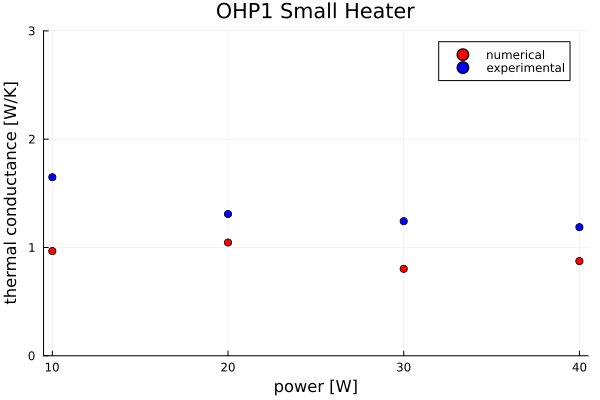

In [356]:
i1 = 8
i2 = 4
p1 = scatter(title = "OHP1 Small Heater",ylim=(0,3),xlim=(9.5,40.5),xlabel="power [W]", ylabel="thermal conductance [W/K]")
scatter!(p1, [0.0], [0.0], color=:red,label="numerical")
scatter!(p1, [0.0], [0.0], color=:blue,label="experimental")
for j in 1:4
    scatter!(p1, [power_nume[j]],[mean(power_nume[j] ./ (OHPg_nume[j][i2]-OHPg_nume[j][i1])[70:100])],color=:red,label=false)
    scatter!(p1, [power_nume[j]],[mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[70:100])],color=:blue,label=false)
end
savefig(p1,"OHP1 Small Heater.pdf")
p1

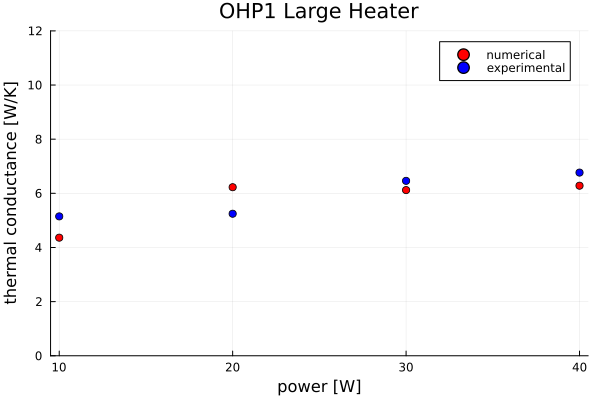

In [357]:
i1 = 8
i2 = 4
p1 = scatter(title = "OHP1 Large Heater",ylim=(0,12),xlim=(9.5,40.5),xlabel="power [W]", ylabel="thermal conductance [W/K]")
scatter!(p1, [0.0], [0.0], color=:red,label="numerical")
scatter!(p1, [0.0], [0.0], color=:blue,label="experimental")
for j in 5:8
    scatter!(p1, [power_nume[j]],[mean(power_nume[j] ./ (OHPg_nume[j][i2]-OHPg_nume[j][i1])[70:100])],color=:red,label=false)
    scatter!(p1, [power_nume[j]],[mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[70:100])],color=:blue,label=false)
end
# j=8
#  scatter!(p1, [power_nume[j]],[5.91],color=:red,label=false)
# scatter!(p1, [power_nume[j]],[mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[90:100])],color=:blue,label=false)


savefig(p1,"OHP1 Large Heater.pdf")
p1

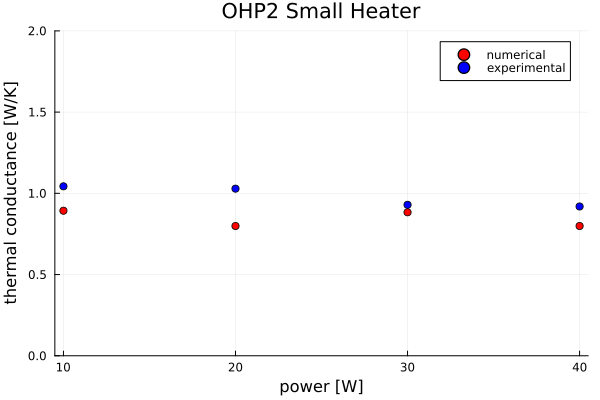

In [358]:
i1 = 8
i2 = 4
p1 = scatter(title = "OHP2 Small Heater",ylim=(0,2),xlim=(9.5,40.5),xlabel="power [W]", ylabel="thermal conductance [W/K]")
scatter!(p1, [0.0], [0.0], color=:red,label="numerical")
scatter!(p1, [0.0], [0.0], color=:blue,label="experimental")
for j in 9:12
    scatter!(p1, [power_nume[j]],[mean(power_nume[j] ./ (OHPg_nume[j][i2]-OHPg_nume[j][i1])[70:100])],color=:red,label=false)
    scatter!(p1, [power_nume[j]],[mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[70:100])],color=:blue,label=false)
end
savefig(p1,"OHP2 Small Heater.pdf")
p1

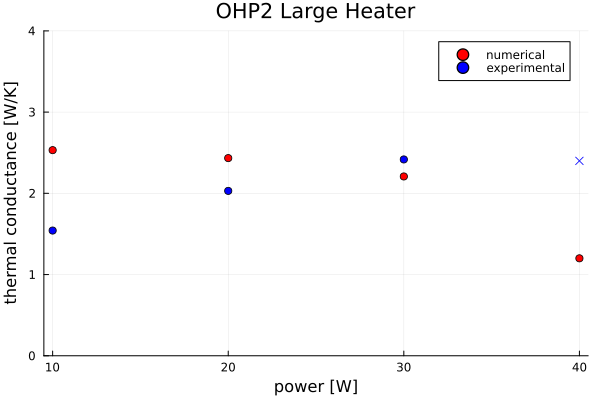

In [360]:
i1 = 8
i2 = 4
p1 = scatter(title = "OHP2 Large Heater",ylim=(0,4),xlim=(9.5,40.5),xlabel="power [W]", ylabel="thermal conductance [W/K]")
scatter!(p1, [0.0], [0.0], color=:red,label="numerical")
scatter!(p1, [0.0], [0.0], color=:blue,label="experimental")
for j in 13:15
    scatter!(p1, [power_nume[j]],[mean(power_nume[j] ./ (OHPg_nume[j][i2]-OHPg_nume[j][i1])[70:100])],color=:red,label=false)
    scatter!(p1, [power_nume[j]],[mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[70:100])],color=:blue,label=false)
end
j = 16
 scatter!(p1, [power_nume[j]],[1.2],color=:red,label=false)
 
scatter!(p1, [power_nume[j]],[mean(power_nume[j] ./ (RTD_hist[j][:,i2]-RTD_hist[j][:,i1])[70:100])],color=:blue,label=false,markershape=:x)

savefig(p1,"OHP2 Large Heater.pdf")
p1

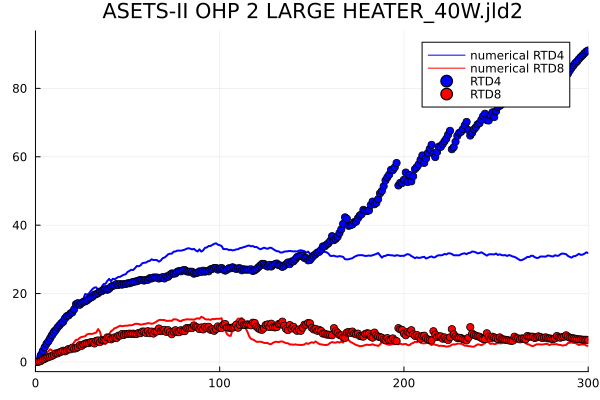

In [362]:
i = 16
plot(OHPt_nume[i],OHPg_nume[i][i2] .- OHPg_nume[i][i1][1],xlim=(0,300),title=name_dict[i],label="numerical RTD"*string(i2),linewidth=2,color=:blue)
plot!(OHPt_nume[i],OHPg_nume[i][i1].- OHPg_nume[i][i1][1],label="numerical RTD"*string(i1),linewidth=2,color=:red)
scatter!(RTDt_hist[i],RTD_hist[i][:,i2] .- RTD_hist[i][:,i2][1],label="RTD"*string(i2),color=:blue)
scatter!(RTDt_hist[i],RTD_hist[i][:,i1] .- RTD_hist[i][:,i1][1],label="RTD"*string(i1),color=:red)

# savefig("temperature curve.pdf")

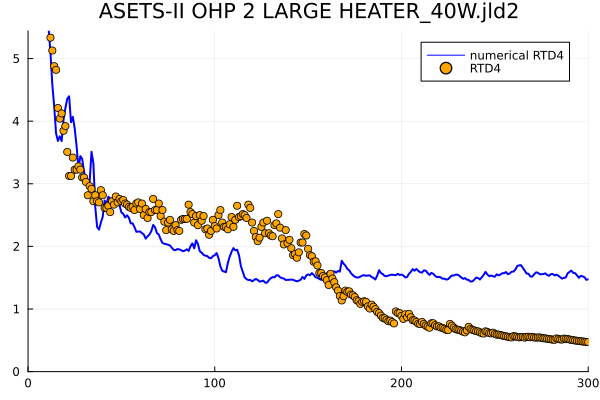

In [368]:
i = 16
plot(OHPt_nume[i],power_nume[i] ./ (OHPg_nume[i][i2] .- OHPg_nume[i][i1]),xlim=(0,300),ylim=(0,5),title=name_dict[i],label="numerical RTD"*string(i2),linewidth=2,color=:blue)
scatter!(RTDt_hist[i],power_nume[i] ./ (RTD_hist[i][:,i2] .- RTD_hist[i][:,i1]),label="RTD"*string(i2),color=:orange,ylim=(0,2*power_nume[i] ./(RTD_hist[i][50,i2] .- RTD_hist[i][50,i1])))
# savefig("conductance curve.pdf")

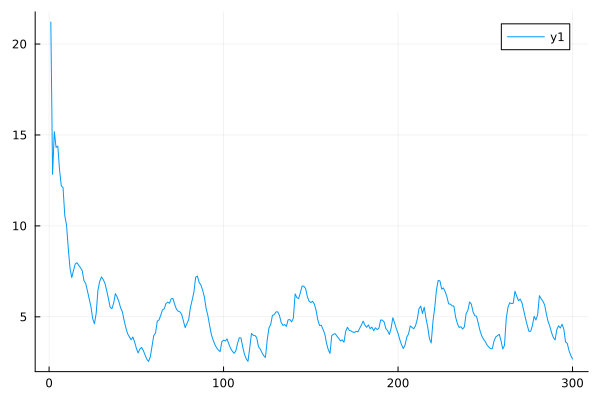

In [74]:
plot(10 ./ (OHPg_nume[i][i2] .- OHPg_nume[i][i1]))

In [20]:
Hₗ = 462
@gif for i=1:1:length(sysfinal)
    Htmp = sys_to_Harray(sysfinal[i])
    Htmp_marker = round.(div.(Htmp,Hₗ-1e-10))
    plot(ohp,clim=(0,2),fillalpha=0,linewidth=2.0,linecolor=palette([:yellow,  :blue, :green]),line_z=Htmp_marker,xlabel="x ",ylabel="y ",title=string("time = ", round(tube_hist_t[i], digits=2), "[s] \n",  "T - T0 [K]"),border=:none,axis=nothing)
end

LoadError: UndefVarError: sysfinal not defined

In [22]:
length(sysfinal[1].liquid.Xarrays)

30

In [23]:
for i = 1 : length(sysfinal[3].liquid.Xarrays)
    println(sysfinal[end].liquid.Xarrays[i][2]- sysfinal[end].liquid.Xarrays[i][1])
end

0.0013831343476327085
0.001355283443403632
0.0008570607853353174
0.001143474535411304
0.0008117933096425389
0.0012091361464521277
0.000981153410287483
0.0010895588932688938
0.0008390429196123428
0.001152702245172943
0.0009776776937364673
0.0009668442263768284
0.0009083812319117257
0.0006384818736133724
0.0011695285289694546
0.001062844979824007
0.0008811142921034687
0.001028331618692313
0.0008822740931329065


In [24]:
minimum(sysfinal[end-100].vapor.δstart)

1.3233285949135222e-5

In [ ]:
more freedom in this model 
haven't used the data-aiimilation tools

